# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive"

In [3]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/BigBasket Products.csv')

In [6]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [7]:
df.shape

(27555, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [9]:
df.nunique()

index           27555
product         23540
category           11
sub_category       90
brand            2313
sale_price       3256
market_price     1348
type              426
rating             40
description     21944
dtype: int64

In [10]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


In [11]:
df.isnull().any()

index           False
product          True
category        False
sub_category    False
brand            True
sale_price      False
market_price    False
type            False
rating           True
description      True
dtype: bool

In [12]:
df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [13]:
# Drop rows with null values in 'product' and 'brand' columns
df = df.dropna(subset=['product', 'brand'])

# Fill null values in 'description' column with 'No description'
df['description'].fillna('No description', inplace=True)

# Replace null values in 'rating' column with 0
df['rating'].fillna(0, inplace=True)

# Verify the changes
print(df.isnull().sum())

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64


<ipython-input-13-b74ad6985e69>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'].fillna('No description', inplace=True)
<ipython-input-13-b74ad6985e69>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'].fillna(0, inplace=True)


# run before

In [14]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


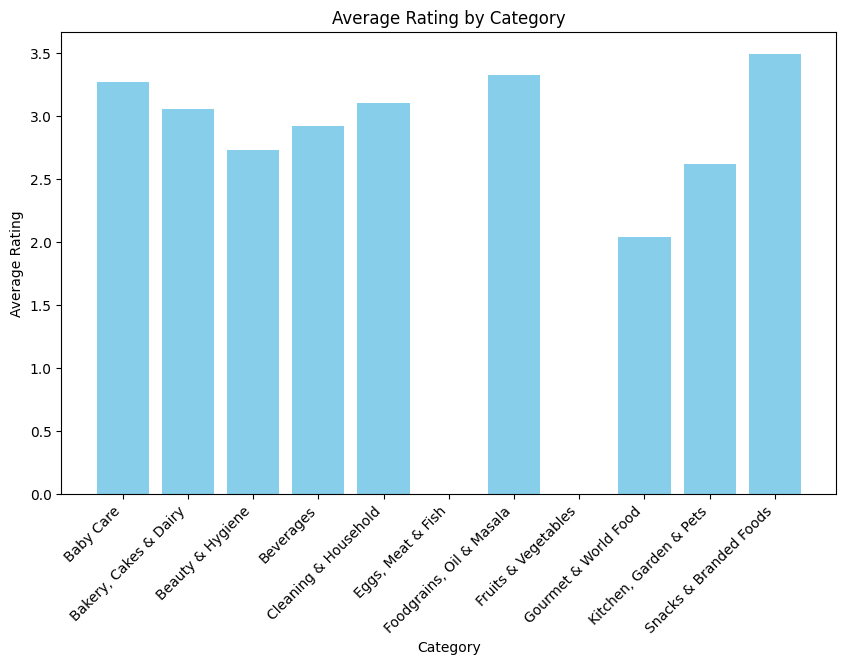

In [15]:
# Group by 'category' and calculate the mean rating for each category
category_ratings = df.groupby('category')['rating'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(category_ratings['category'], category_ratings['rating'], color='skyblue')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

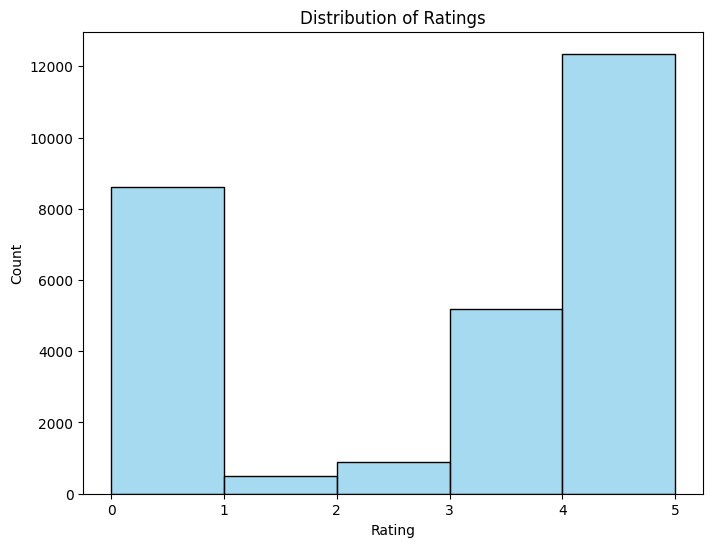

In [16]:
# Plotting histogram of ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=5, kde=False, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Recommender

In [17]:
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity

label_encoder = preprocessing.LabelEncoder()

# Encoding
dataset_encoded = df.copy()
dataset_encoded['category'] = label_encoder.fit_transform(dataset_encoded['category'])
dataset_encoded['sub_category'] = label_encoder.fit_transform(dataset_encoded['sub_category'])
dataset_encoded['brand'] = label_encoder.fit_transform(dataset_encoded['brand'])
dataset_encoded['type'] = label_encoder.fit_transform(dataset_encoded['type'])
dataset_encoded['product'] = label_encoder.fit_transform(dataset_encoded['product'])

# Remove the 'description' column
dataset_encoded = dataset_encoded.drop(columns=['description', 'index'])

In [18]:
# Extracting numeric features
numeric_features = dataset_encoded[['sub_category', 'brand', 'type']]

# Calculating cosine similarity
similarity_matrix = cosine_similarity(numeric_features, numeric_features)

# Creating a DataFrame for better visualization
similarity_df = pd.DataFrame(similarity_matrix, index=dataset_encoded.index, columns=dataset_encoded.index)

In [19]:
# Function to get top N recommendations for a given product
def get_recommendations(product_id, top_n=5):
    # Get the similarity scores for the given product
    product_similarity = similarity_df.loc[product_id]

    # Sort the products based on similarity scores
    similar_products_ids = product_similarity.sort_values(ascending=False).index[1:top_n+1]

    # Get the details of the recommended products
    recommended_products = df.loc[similar_products_ids]

    return recommended_products

# Testing 1

In [20]:
# Test the recommender system
test_product_id = 1500  # Replace with the ID of the product you want to test
recommendations = get_recommendations(test_product_id)

In [21]:
test_product = df.loc[test_product_id]
print(f'you seached for following item:')
test_product.head

you seached for following item:


<bound method NDFrame.head of index                                                        1501
product         Stainless Steel Airtight Storage Container - S...
category                                   Kitchen, Garden & Pets
sub_category                                       Steel Utensils
brand                                                  Steel Lock
sale_price                                                  225.0
market_price                                                299.0
type                                     Steel Storage Containers
rating                                                        4.3
description     Stainless Steel Special Airtight Containers us...
Name: 1500, dtype: object>

In [22]:
print('Here is the result:')
recommendations.head()

Here is the result:


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
295,296,Stainless Steel Airtight Storage Container - S...,"Kitchen, Garden & Pets",Steel Utensils,Steel Lock,209.0,269.0,Steel Storage Containers,3.7,Stainless Steel Special Airtight Containers us...
12093,12094,Stainless Steel Airtight Storage Container - S...,"Kitchen, Garden & Pets",Steel Utensils,Steel Lock,119.0,159.0,Steel Storage Containers,4.1,Stainless Steel Special Airtight Containers us...
22774,22775,Stainless Steel Airtight Storage Container - S...,"Kitchen, Garden & Pets",Steel Utensils,Steel Lock,315.0,419.0,Steel Storage Containers,4.2,Stainless Steel Special Airtight Containers us...
2564,2565,Stainless Steel Airtight Storage Container - S...,"Kitchen, Garden & Pets",Steel Utensils,Steel Lock,359.0,479.0,Steel Storage Containers,4.4,Stainless Steel Special Airtight Containers us...
2765,2766,Stainless Steel Airtight Storage Container - S...,"Kitchen, Garden & Pets",Steel Utensils,Steel Lock,139.0,184.0,Steel Storage Containers,3.2,Stainless Steel Special Airtight Containers us...


# Testing 2

In [23]:
# Test the recommender system
test_product_id = 6000  # Replace with the ID of the product you want to test
recommendations = get_recommendations(test_product_id)

In [24]:
test_product = df.loc[test_product_id]
print(f'you seached for following item:')
test_product.head

you seached for following item:


<bound method NDFrame.head of index                                                        6001
product                               Moroccan Rose Handmade Soap
category                                         Beauty & Hygiene
sub_category                                     Bath & Hand Wash
brand                                                      Nyassa
sale_price                                                  325.0
market_price                                                325.0
type                                         Bathing Bars & Soaps
rating                                                        3.6
description     An authentic fragrance of the Moroccan rose fl...
Name: 6000, dtype: object>

In [25]:
print('Here is the result:')
recommendations.head()

Here is the result:


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
15398,15399,Mandarin Citrus Handmade Soap,Beauty & Hygiene,Bath & Hand Wash,Nyassa,325.0,325.0,Bathing Bars & Soaps,5.0,It has a refreshing zesty fragrance. Did you k...
8499,8500,Oudh Golab Middle Eastern Handmade Soap,Beauty & Hygiene,Bath & Hand Wash,Nyassa,475.0,475.0,Bathing Bars & Soaps,4.8,When Lady Macbeth looked at her bloodied hands...
15534,15535,Coffee and Charcoal Handmade Soap,Beauty & Hygiene,Bath & Hand Wash,Nyassa,365.0,365.0,Bathing Bars & Soaps,3.5,"Cafe noir, a must have for all coffee lovers. ..."
11352,11353,Almond Butter Soap,Beauty & Hygiene,Bath & Hand Wash,Nyassa,325.0,325.0,Bathing Bars & Soaps,3.5,"The smell of cookies being baked in milk, hone..."
7811,7812,Argan Oil Handmade Soap,Beauty & Hygiene,Bath & Hand Wash,Nyassa,365.0,365.0,Bathing Bars & Soaps,4.7,"Captivate your senses with the rich, sweet and..."
